![NASA](http://www.nasa.gov/sites/all/themes/custom/nasatwo/images/nasa-logo.svg)
![DEVELOP](../../DEVELOP_logo.png)

---

# matplotlib and HDF

### Goddard Space Flight Center

#### March 1, 2017

---

---

# matplotlib

---

* [matplotlib Website](http://matplotlib.org)
* Visualization package of Python (2D/3d) meant to be a replacement for Matlab
* Version 2.0 is most recent (lots of fixes!)
* Earth Science visualizations - typically mixture of matplotlib and other packages for projections ([Basemap](http://matplotlib.org/basemap/), [cartopy](http://scitools.org.uk/cartopy/))
* [PlotLy](http://plot.ly) - javascript alternative
* [How to make beautiful data visualizations in Python with matplotlib](http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/)

### Basic Example

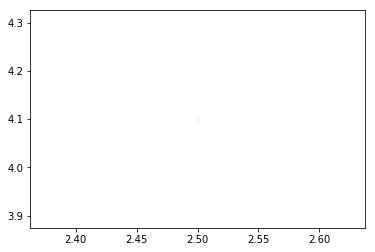

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.plot(x, y, 'red-circle')
plt.plot(2.5, 4.1, 'o', color='#F0FFF5')

_Note:_ The statement __`%matplotlib inline`__ is only for the notebook and tells the interpreter to display the plot within the notebook.

If you were to put this in a .py script, you will want either of the following:

* __`plt.show()`__ if you are running a script and want to view the plot interactively.
* __`plt.savefig('filename.png')`__ if you want to save the image to a file.

# Drawing a Line

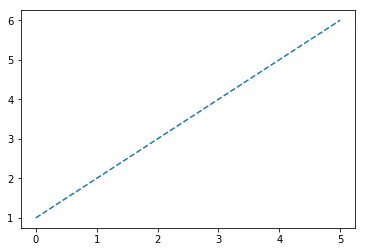

In [16]:
x = [0,1,2,3,4,5]
y = [1,2,3,4,5,6]
plt.plot(x, y, '--')

### Adding Features (Legend)

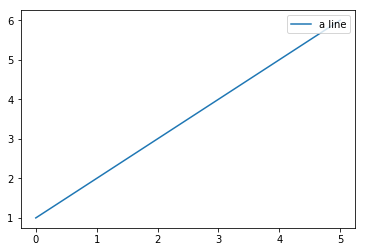

In [23]:
# plot with legend
plt.plot(x, y, label='a line')
plt.legend(loc='upper right')

### Multiple Lines

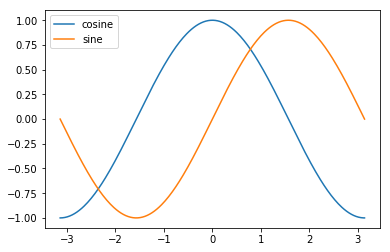

In [27]:
import numpy as np

x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
cos, sin = np.cos(x), np.sin(x)

plt.plot(x, cos, label='cosine')
plt.plot(x, sin, label='sine')
plt.legend()

In [26]:
import numpy as np
x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
print(x)

[-3.14159265 -3.11695271 -3.09231277 -3.06767283 -3.04303288 -3.01839294
 -2.993753   -2.96911306 -2.94447311 -2.91983317 -2.89519323 -2.87055329
 -2.84591335 -2.8212734  -2.79663346 -2.77199352 -2.74735358 -2.72271363
 -2.69807369 -2.67343375 -2.64879381 -2.62415386 -2.59951392 -2.57487398
 -2.55023404 -2.52559409 -2.50095415 -2.47631421 -2.45167427 -2.42703432
 -2.40239438 -2.37775444 -2.3531145  -2.32847456 -2.30383461 -2.27919467
 -2.25455473 -2.22991479 -2.20527484 -2.1806349  -2.15599496 -2.13135502
 -2.10671507 -2.08207513 -2.05743519 -2.03279525 -2.0081553  -1.98351536
 -1.95887542 -1.93423548 -1.90959553 -1.88495559 -1.86031565 -1.83567571
 -1.81103577 -1.78639582 -1.76175588 -1.73711594 -1.712476   -1.68783605
 -1.66319611 -1.63855617 -1.61391623 -1.58927628 -1.56463634 -1.5399964
 -1.51535646 -1.49071651 -1.46607657 -1.44143663 -1.41679669 -1.39215674
 -1.3675168  -1.34287686 -1.31823692 -1.29359698 -1.26895703 -1.24431709
 -1.21967715 -1.19503721 -1.17039726 -1.14575732 -1.

### Multiple Plots, Single Figure

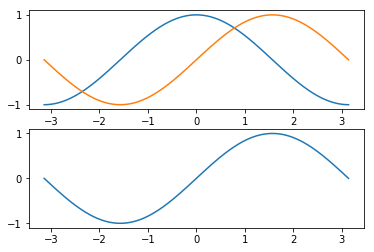

In [46]:
plt.figure(1)
plt.subplot(211)
plt.plot(x, cos) # notice the color name
plt.plot(x, sin)

plt.subplot(212)
plt.plot(x, sin)

In [47]:
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Return a subplot axes positioned by the given grid definition.
    
    Typical call signature::
    
      subplot(nrows, ncols, plot_number)
    
    Where *nrows* and *ncols* are used to notionally split the figure
    into ``nrows * ncols`` sub-axes, and *plot_number* is used to identify
    the particular subplot that this function is to create within the notional
    grid. *plot_number* starts at 1, increments across rows first and has a
    maximum of ``nrows * ncols``.
    
    In the case when *nrows*, *ncols* and *plot_number* are all less than 10,
    a convenience exists, such that the a 3 digit number can be given instead,
    where the hundreds represent *nrows*, the tens represent *ncols* and the
    units represent *plot_number*. For instance::
    
      subplot(211)
    
    produces a subaxes in a figure which represents the top plot (i.e. the
    first) in a 2 row by 1 column notiona

# Heirarchical Data Format (HDF)

---

Two types of HDF files:
* [HDF5](http://www.hdfgroup.org): A structured file of groups of fields of variables of dimensions. ([h5py](http://www.h5py.org))
* [netCDF](http://www.unidata.ucar.edu/software/netcdf/): A simpler HDF file with only one group (netCDF3 and older do not support groups) of fields of variables of dimensions. ([netCDF4](http://unidata.github.io/netcdf4-python/))

### Creating Files

In [48]:
import netCDF4 as nc

f = nc.Dataset('test.nc4', 'w')
f.close()

In [49]:
import h5py as h5

f = h5.File('test.h5', 'w')
f.close()

### Looking inside

---

From Anaconda Prompt:

```bash
ncdump -h filename.nc

ncdump -h filename.h5
```

### Structure

---

* Groups
* Dimensions
* Variables
* Attributes

### Groups

In [51]:
# netCDF
rootgrp = nc.Dataset('test.nc4', 'a')
fcstgrp = rootgrp.createGroup('forecasts')
anlgrp = rootgrp.createGroup('analyses')

# we can also create them like folders
fcst1 = rootgrp.createGroup('/forecasts/model1')
fcst2 = rootgrp.createGroup('/forecasts/model2')

rootgrp.close()

In [52]:
# HDF
rootgrp = h5.File('test.h5', 'a')
fcstgrp = rootgrp.create_group('forecasts')
anlgrp = rootgrp.create_group('analyses')

# can again also create like folders
fcst1 = rootgrp.create_group('/forecasts/model1')
fcst2 = rootgrp.create_group('/forecasts/model2')

rootgrp.close()

In [55]:
# let's look inside these:
f = nc.Dataset('test.nc4', 'r')
print(f)
print('\n')
print(f.groups)
f.close()

print('\n')

f = h5.File('test.h5', 'r')
print(f)
print(f.keys())
f.close()

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: forecasts, analyses



OrderedDict([(u'forecasts', <type 'netCDF4._netCDF4.Group'>
group /forecasts:
    dimensions(sizes): 
    variables(dimensions): 
    groups: model1, model2
), (u'analyses', <type 'netCDF4._netCDF4.Group'>
group /analyses:
    dimensions(sizes): 
    variables(dimensions): 
    groups: 
)])


<HDF5 file "test.h5" (mode r)>
[u'analyses', u'forecasts']


### Dimensions

In [57]:
# netCDF (netCDF3 can only have 1 unlimmited dimension)
rootgrp = nc.Dataset('test.nc4', 'a')
level = rootgrp.createDimension('level', None) # or 0
time = rootgrp.createDimension('time', None) # or 0
lat = rootgrp.createDimension('lat', 73)
lon = rootgrp.createDimension('lon', 144)
rootgrp.close()

In [ ]:
# HDF doesn't really have dimensions

In [59]:
# let's look inside these:
f = nc.Dataset('test.nc4', 'r')
print(f.dimensions)
f.close()

OrderedDict([(u'level', <type 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'level', size = 0
), (u'time', <type 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 0
), (u'lat', <type 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 73
), (u'lon', <type 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 144
)])


### Variables

In [60]:
import numpy as np
from numpy.random import uniform

In [61]:
# netCDF
rootgrp = nc.Dataset('test.nc4', 'a')
times = rootgrp.createVariable('time', 'f8', ('time',))
levels = rootgrp.createVariable('level', 'i4', ('level',))
latitudes = rootgrp.createVariable('latitude', 'f4', ('lat',))
longitudes = rootgrp.createVariable('longitude', 'f4', ('lon',))

temp = rootgrp.createVariable('temp', 'f4', ('time','level','lat','lon',))

# write some sample data
latitudes[:] = np.arange(-90, 91, 2.5)
longitudes[:] = np.arange(-180, 180, 2.5)
levels[:] = [1000., 850., 700., 500., 300., 250., 200., 150., 100., 50.]
temp[0:5, 0:10, :, :] = uniform(size=(5,10,len(latitudes), len(longitudes)))
rootgrp.close()

In [62]:
# HDF (has datasets)
rootgrp = h5.File('test.h5', 'a')
# maxshape is only if you need unlimited dimensions
temp = rootgrp.create_dataset('temp', (5,10, 73, 144,), maxshape=(None, None, 73, 144), dtype='f4')
# here, you just assign data to temp
temp[:] = uniform(size=(5, 10, 73, 144))
rootgrp.close()

In [64]:
# let's look inside these:
rootgrp = nc.Dataset('test.nc4', 'a')
print(rootgrp.variables.keys())
print(rootgrp.variables['temp'][0,0,[0,1,2,3],[0,1,2,3]])
rootgrp.close()

rootgrp = h5.File('test.h5', 'r')
print(rootgrp['temp'])
print(rootgrp['temp'][0, 0, 0:4, 0:4])
rootgrp.close()

[u'time', u'level', u'latitude', u'longitude', u'temp']
[[ 0.41015527  0.40631986  0.10267066  0.93808627]
 [ 0.47038493  0.55063295  0.91086882  0.52334672]
 [ 0.27892506  0.48110983  0.4794006   0.95779741]
 [ 0.72449797  0.19362372  0.81611872  0.01212891]]
<HDF5 dataset "temp": shape (5, 10, 73, 144), type "<f4">
[[ 0.49607593  0.88358039  0.81215775  0.99389112]
 [ 0.51340181  0.61961353  0.93530029  0.74421412]
 [ 0.53950232  0.62176359  0.27123785  0.41296488]
 [ 0.17852955  0.70025551  0.62833965  0.86961234]]


# Attributes

---

This is just the metadata for the variables/groups.

In [65]:
f = nc.Dataset('/Users/ebsmith2/Downloads/GEOS.fp.fcst.inst1_2d_hwl_Nx.20170301_12+20170301_1000.V01.nc4', 'r')

In [66]:
f

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Title: 2d,1-Hourly,Instantaneous,Single-Level,Forecast,Hyperwall
    History: File written by MAPL_CFIO
    Source: GEOSadas-5_16_5_OPS
    Contact: http://gmao.gsfc.nasa.gov
    Conventions: CF
    Institution: NASA Global Modeling and Assimilation Office
    References: see MAPL documentation
    Filename: GEOS.fp.fcst.inst1_2d_hwl_Nx.20170301_12+20170301_1000.V01.nc4
    Comment: NetCDF-4
    dimensions(sizes): lon(1152), lat(721), time(1)
    variables(dimensions): float64 lon(lon), float64 lat(lat), int32 time(time), float32 BCCMASS(time,lat,lon), float32 BCEXTTAU(time,lat,lon), float32 BCFLUXU(time,lat,lon), float32 BCFLUXV(time,lat,lon), float32 BCSMASS(time,lat,lon), float32 CFC12strat(time,lat,lon), float32 CFC12trop(time,lat,lon), float32 CO2CL(time,lat,lon), float32 COCL(time,lat,lon), float32 COCLbbae(time,lat,lon), float32 COCLbbaf(time,lat,lon), float32 COCLbbgl(time,lat,lon), float32

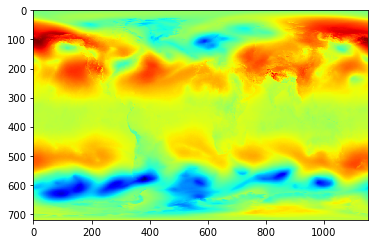

In [86]:
plt.imshow(f.variables['SLP'][0][::-1], cmap='jet')